# Used car price prediction

## Part 1: Data preprocessing

<b>Dataset link:</b> https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv

## Importing the libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Data exploration
<b>Load the data

In [2]:
dataset = pd.read_csv('car data.csv')

<b>Print first 5 rows from my dataset

In [3]:
dataset.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

<b>Print the last 5 rows from my dataset

In [4]:
dataset.tail()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
296     city  2016           9.50           11.6       33988    Diesel   
297     brio  2015           4.00            5.9       60000    Petrol   
298     city  2009           3.35           11.0       87934    Petrol   
299     city  2017          11.50           12.5        9000    Diesel   
300     brio  2016           5.30            5.9        5464    Petrol   

    Seller_Type Transmission  Owner  
296      Dealer       Manual      0  
297      Dealer       Manual      0  
298      Dealer       Manual      0  
299      Dealer       Manual      0  
300      Dealer       Manual      0

<b>Print the number of rows and columns

In [5]:
dataset.shape

(301, 9)

<b>Print the information ( type of each column and the value of non-null of each one)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
dataset.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
# Categorical columns
dataset.select_dtypes(include='object').columns

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [9]:
len(dataset.select_dtypes(include='object').columns)

4

In [10]:
# numerical columns
dataset.select_dtypes(include=['int64','float64']).columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

In [11]:
len(dataset.select_dtypes(include=['int64','float64']).columns)

5

In [12]:
# statistical summary
dataset.describe()

Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000

## Dealing with missing values

In [13]:
dataset.isnull().values.any()

False

In [14]:
dataset.isnull().values.sum()

0

In [15]:
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

## Restructure the dataset

In [16]:
dataset.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

In [17]:
dataset = dataset.drop(columns='Car_Name')

In [18]:
dataset.head()

Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0  2014           3.35           5.59       27000    Petrol      Dealer   
1  2013           4.75           9.54       43000    Diesel      Dealer   
2  2017           7.25           9.85        6900    Petrol      Dealer   
3  2011           2.85           4.15        5200    Petrol      Dealer   
4  2014           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  
0       Manual      0  
1       Manual      0  
2       Manual      0  
3       Manual      0  
4       Manual      0

In [19]:
# add a column
dataset['Current Year'] = 2023

In [20]:
dataset.head()

Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0  2014           3.35           5.59       27000    Petrol      Dealer   
1  2013           4.75           9.54       43000    Diesel      Dealer   
2  2017           7.25           9.85        6900    Petrol      Dealer   
3  2011           2.85           4.15        5200    Petrol      Dealer   
4  2014           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  Current Year  
0       Manual      0          2023  
1       Manual      0          2023  
2       Manual      0          2023  
3       Manual      0          2023  
4       Manual      0          2023

In [21]:
dataset['Years Old'] = dataset['Current Year'] - dataset['Year']

dataset.head()

In [23]:
dataset = dataset.drop(columns=['Current Year', 'Year'])

In [24]:
dataset.head()

Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0           3.35           5.59       27000    Petrol      Dealer   
1           4.75           9.54       43000    Diesel      Dealer   
2           7.25           9.85        6900    Petrol      Dealer   
3           2.85           4.15        5200    Petrol      Dealer   
4           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  Years Old  
0       Manual      0          9  
1       Manual      0         10  
2       Manual      0          6  
3       Manual      0         12  
4       Manual      0          9

## Encoding the categorical data

In [25]:
dataset.select_dtypes(include='object').columns

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [26]:
len(dataset.select_dtypes(include='object').columns)

3

In [27]:
dataset['Fuel_Type'].nunique()

3

In [28]:
dataset['Seller_Type'].nunique()

2

In [29]:
# one hot encoding
dataset = pd.get_dummies(data=dataset, drop_first=True)

In [30]:
dataset.head()

Selling_Price  Present_Price  Kms_Driven  Owner  Years Old  \
0           3.35           5.59       27000      0          9   
1           4.75           9.54       43000      0         10   
2           7.25           9.85        6900      0          6   
3           2.85           4.15        5200      0         12   
4           4.60           6.87       42450      0          9   

   Fuel_Type_Diesel  Fuel_Type_Petrol  Seller_Type_Individual  \
0                 0                 1                       0   
1                 1                 0                       0   
2                 0                 1                       0   
3                 0                 1                       0   
4                 1                 0                       0   

   Transmission_Manual  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

In [31]:
dataset.shape

(301, 9)

## Correlation matrix

In [32]:
dataset_2 = dataset.drop(columns='Selling_Price')

<AxesSubplot:title={'center':'Correlated with Selling Price'}>

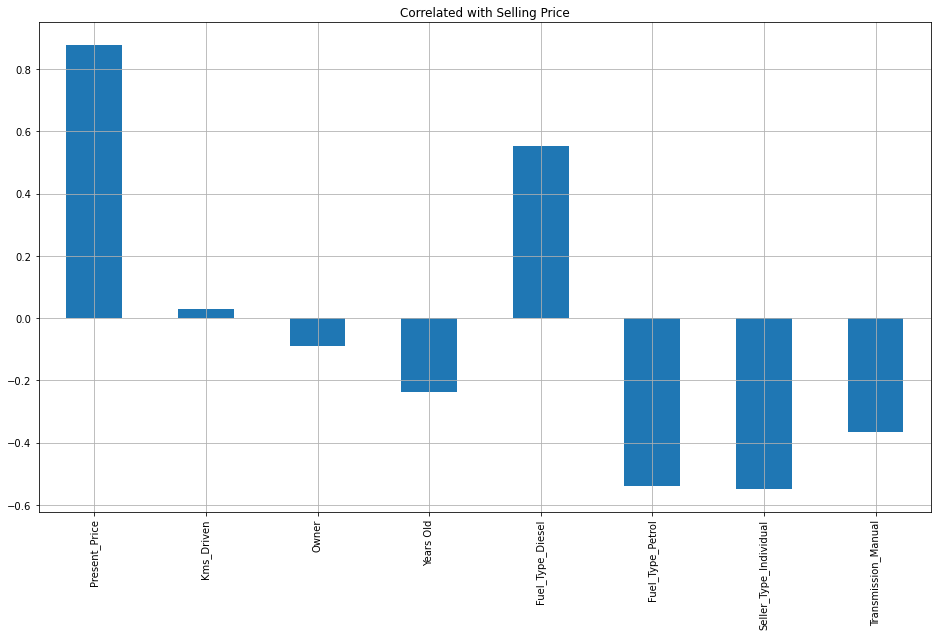

In [33]:
dataset_2.corrwith(dataset['Selling_Price']).plot.bar(
    figsize=(16,9), title='Correlated with Selling Price', grid=True
)

In [34]:
corr = dataset.corr()

<AxesSubplot:>

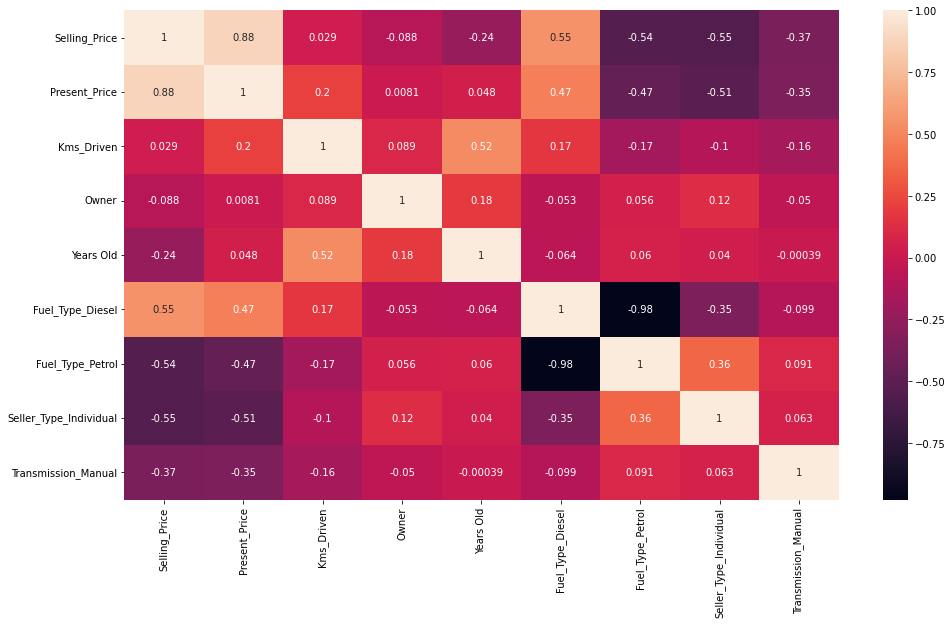

In [35]:
# heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(corr, annot=True)

## Splitting the dataset

In [46]:
# matrix of features
X = dataset.drop(columns='Selling_Price')

In [47]:
# target variable
Y = dataset['Selling_Price']    

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [49]:
print(X.shape, X_train.shape, X_test.shape)

(301, 8) (240, 8) (61, 8)


In [50]:
print(Y.shape, Y_train.shape, Y_test.shape)

(301,) (240,) (61,)


## Feature scaling

In [51]:
#we are not applying the feature scaling for this specific business problem

## Part 2: Building the model

In [53]:
from sklearn.linear_model import LinearRegression
regressor_mlr = LinearRegression()
regressor_mlr.fit(X_train, Y_train)

LinearRegression()

In [54]:
y_pred = regressor_mlr.predict(X_test)

In [55]:
from sklearn.metrics import r2_score

In [56]:
r2_score(Y_test, y_pred)

0.914434297222852

## 2) Random forest regression

In [57]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor()
regressor_rf.fit(X_train, Y_train)

RandomForestRegressor()

In [58]:
y_pred = regressor_rf.predict(X_test)

In [59]:
from sklearn.metrics import r2_score
r2_score(Y_test, y_pred)

0.9547539754058497

## Part 3: Fing the optimal parameters using RandomizedSearchCV

In [60]:
from sklearn.model_selection import RandomizedSearchCV

In [61]:
parameters = {
    'n_estimators':[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'criterion':['mse', 'mae'],
    'max_depth':[10, 20, 30, 40, 50],
    'min_samples_split':[2, 5, 10, 20, 50],
    'min_samples_leaf':[1, 2, 5, 10],
    'max_features':['auto', 'sqrt', 'log2']
}

In [62]:
parameters

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'criterion': ['mse', 'mae'],
 'max_depth': [10, 20, 30, 40, 50],
 'min_samples_split': [2, 5, 10, 20, 50],
 'min_samples_leaf': [1, 2, 5, 10],
 'max_features': ['auto', 'sqrt', 'log2']}

In [63]:
random_cv = RandomizedSearchCV(estimator=regressor_rf, param_distributions=parameters, n_iter=10,
                               scoring='neg_mean_absolute_error', cv=5, verbose=2, n_jobs=-1)

In [64]:
random_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20, 50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   scoring='neg_mean_absolute_error', verbose=2)

In [65]:
random_cv.best_estimator_

RandomForestRegressor(criterion='mae', max_depth=10, max_features='sqrt',
                      n_estimators=300)

In [66]:
random_cv.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'mae'}

## Part 4: Final model (Random forest)

In [70]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
regressor.fit(X_train, Y_train)

RandomForestRegressor(criterion='mae', max_depth=10, max_features='sqrt',
                      n_estimators=300)

In [71]:
y_pred = regressor.predict(X_test)

In [72]:
from sklearn.metrics import r2_score
r2_score(Y_test, y_pred)

0.9349698639868773

## Part 5: Predicting a single observation

In [73]:
dataset.head()

Selling_Price  Present_Price  Kms_Driven  Owner  Years Old  \
0           3.35           5.59       27000      0          9   
1           4.75           9.54       43000      0         10   
2           7.25           9.85        6900      0          6   
3           2.85           4.15        5200      0         12   
4           4.60           6.87       42450      0          9   

   Fuel_Type_Diesel  Fuel_Type_Petrol  Seller_Type_Individual  \
0                 0                 1                       0   
1                 1                 0                       0   
2                 0                 1                       0   
3                 0                 1                       0   
4                 1                 0                       0   

   Transmission_Manual  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

In [74]:
single_obs = [[8.50, 3500, 0, 5, 1, 0, 0, 1]]

In [75]:
regressor.predict(single_obs)

array([11.78818333])